Name: Shiska Raut <br>
ID:   1001526329

In [102]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
%matplotlib inline

In [103]:
# read data
path = 'nba2021.csv'

df = pd.read_csv(path)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  497 non-null    object 
 1   Pos     497 non-null    object 
 2   Age     497 non-null    int64  
 3   Tm      497 non-null    object 
 4   G       497 non-null    int64  
 5   GS      497 non-null    int64  
 6   MP      497 non-null    float64
 7   FG      497 non-null    float64
 8   FGA     497 non-null    float64
 9   FG%     497 non-null    float64
 10  3P      497 non-null    float64
 11  3PA     497 non-null    float64
 12  3P%     497 non-null    float64
 13  2P      497 non-null    float64
 14  2PA     497 non-null    float64
 15  2P%     497 non-null    float64
 16  eFG%    497 non-null    float64
 17  FT      497 non-null    float64
 18  FTA     497 non-null    float64
 19  FT%     497 non-null    float64
 20  ORB     497 non-null    float64
 21  DRB     497 non-null    float64
 22  TR

In [104]:
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,PF,21,MIA,28,2,14.6,2.6,4.4,0.590,...,0.561,1.3,2.7,4.0,0.6,0.4,0.5,1.0,1.9,6.5
1,Jaylen Adams,PG,24,MIL,6,0,2.8,0.2,1.3,0.125,...,0.000,0.0,0.5,0.5,0.3,0.0,0.0,0.0,0.2,0.3
2,Steven Adams,C,27,NOP,27,27,28.1,3.5,5.8,0.603,...,0.468,4.3,4.6,8.9,2.1,1.0,0.6,1.7,1.9,8.0
3,Bam Adebayo,C,23,MIA,26,26,33.6,7.4,12.9,0.573,...,0.841,1.9,7.3,9.2,5.3,1.0,1.0,3.0,2.6,19.9
4,LaMarcus Aldridge,C,35,SAS,18,18,26.7,5.9,12.5,0.476,...,0.762,0.8,3.5,4.3,1.9,0.4,0.9,0.9,1.5,14.1


Since there are a lot of attributes, not all attributes may be important for prediction position. For example, attributes like player name, Age and Team may not contribute towards making a good prediction and actually end up making the model unnecessarily complex.

In [105]:
df.drop(['Player', 'Age', 'Tm'], axis = 1, inplace = True)

In [106]:
df.head(10)

,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,PF,28,2,14.6,2.6,4.4,0.590,0.0,0.0,0.000,...,0.561,1.3,2.7,4.0,0.6,0.4,0.5,1.0,1.9,6.5
1,PG,6,0,2.8,0.2,1.3,0.125,0.0,0.3,0.000,...,0.000,0.0,0.5,0.5,0.3,0.0,0.0,0.0,0.2,0.3
2,C,27,27,28.1,3.5,5.8,0.603,0.0,0.0,0.000,...,0.468,4.3,4.6,8.9,2.1,1.0,0.6,1.7,1.9,8.0
3,C,26,26,33.6,7.4,12.9,0.573,0.1,0.2,0.400,...,0.841,1.9,7.3,9.2,5.3,1.0,1.0,3.0,2.6,19.9
4,C,18,18,26.7,5.9,12.5,0.476,1.3,3.7,0.358,...,0.762,0.8,3.5,4.3,1.9,0.4,0.9,0.9,1.5,14.1
5,SG,3,0,2.7,0.0,1.0,0.000,0.0,0.3,0.000,...,0.000,0.0,0.3,0.3,0.3,0.0,0.0,0.0,0.3,0.0
6,SG,23,3,19.2,3.3,8.2,0.410,1.0,3.8,0.276,...,0.781,0.2,2.4,2.7,2.0,1.1,0.3,1.3,1.7,8.8
7,SG,19,8,23.9,3.2,7.4,0.429,2.3,5.3,0.436,...,0.892,0.4,2.5,2.9,2.1,1.0,0.2,1.1,1.3,10.4
8,C,28,10,26.2,4.4,6.8,0.642,0.0,0.1,0.250,...,0.758,2.9,6.1,9.0,1.6,0.5,1.6,1.5,1.6,12.3
9,C,12,5,26.7,3.7,5.4,0.677,0.0,0.0,0.000,...,0.754,3.2,7.3,10.4,1.7,0.6,1.6,1.8,1.8,11.2


### Data Anaysis

In [107]:
df.groupby('Pos').count()['G']

Pos
C      90
PF    104
PG     96
SF     85
SG    122
Name: G, dtype: int64

Text(0, 0.5, 'No. of players')

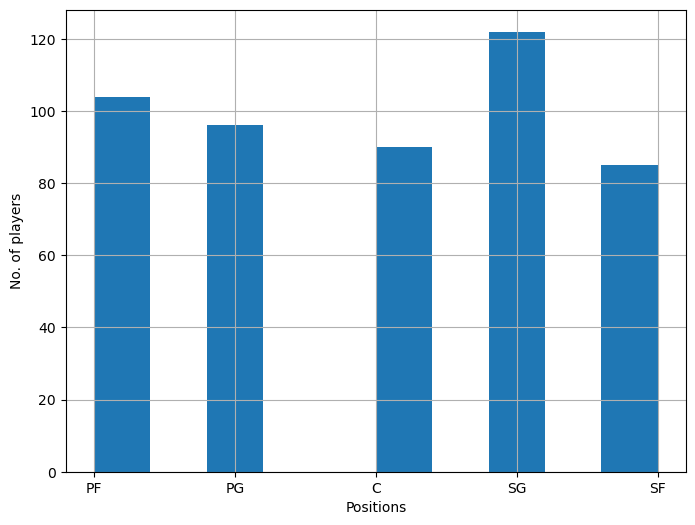

In [108]:
plt.figure(figsize = (8, 6))
plt.hist(df['Pos'])
plt.grid()
plt.xlabel('Positions')
plt.ylabel('No. of players')

#### Linear relationshop between variables using correlation heatmap

<Axes: >

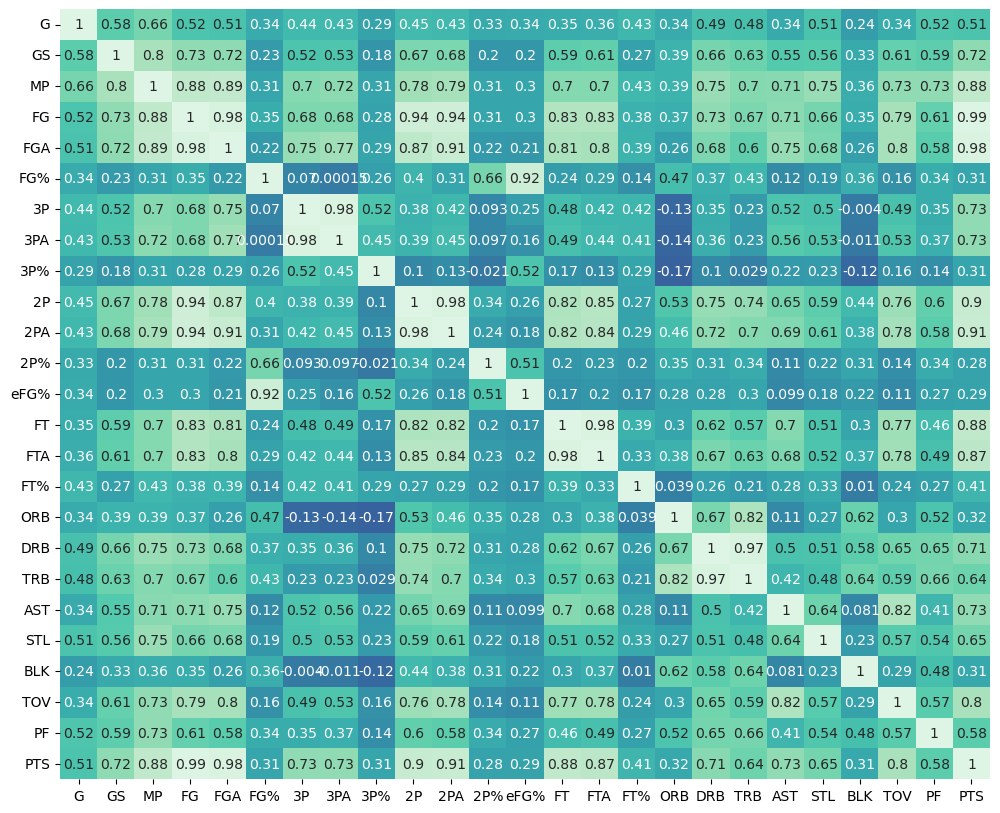

In [109]:
import seaborn as sns

plt.figure(figsize = (12, 10))
sns.heatmap(data = df.corr(numeric_only=True), annot = True, vmax = 1, vmin = -1, cbar = False, cmap = "mako")

The above heatmap shows that features such as: FG, FGA; 3P, 3PA; 2P, 2PA and FT, FTA are highly correlated. Therefore using either value should be good enough. For this assignment, all the "attempts" columns will be kept and the rest will be dropped. In addition,'DRB' has a high correlation with 'TRB'. Therefore, it will be dropped.

In [110]:
df.drop(['FG', '3P', '2P', 'FT', 'PTS', 'TRB'], axis = 1, inplace = True)

In [111]:
df.head()

,Pos,G,GS,MP,FGA,FG%,3PA,3P%,2PA,2P%,eFG%,FTA,FT%,ORB,DRB,AST,STL,BLK,TOV,PF
0,PF,28,2,14.6,4.4,0.590,0.0,0.000,4.4,0.590,0.590,2.4,0.561,1.3,2.7,0.6,0.4,0.5,1.0,1.9
1,PG,6,0,2.8,1.3,0.125,0.3,0.000,1.0,0.167,0.125,0.0,0.000,0.0,0.5,0.3,0.0,0.0,0.0,0.2
2,C,27,27,28.1,5.8,0.603,0.0,0.000,5.7,0.606,0.603,2.3,0.468,4.3,4.6,2.1,1.0,0.6,1.7,1.9
3,C,26,26,33.6,12.9,0.573,0.2,0.400,12.7,0.576,0.576,6.0,0.841,1.9,7.3,5.3,1.0,1.0,3.0,2.6
4,C,18,18,26.7,12.5,0.476,3.7,0.358,8.8,0.525,0.529,1.2,0.762,0.8,3.5,1.9,0.4,0.9,0.9,1.5


Although, the data originally had 27 attributes, we are down to 15. To check if Games Played(G), Games Started(GS) and Minutes Played(MP) are relevant for classificater, we will look at distributions for various Positions.

#### Distributions for Games Played(G), Games Started(GS) and Minutes Played(MP)

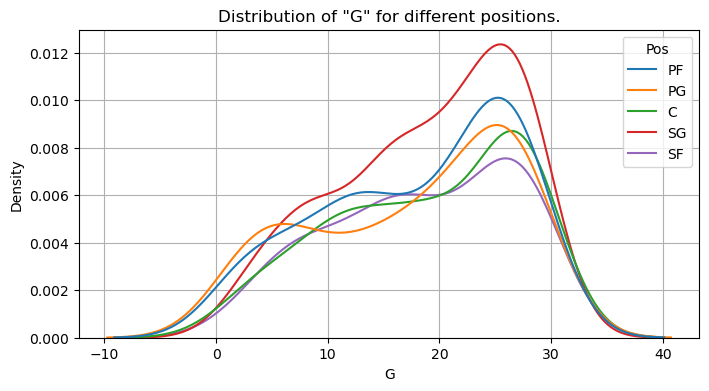

In [112]:
plt.figure(figsize = (8,4))
sns.kdeplot(df, x = 'G', hue = 'Pos')
plt.title('Distribution of "G" for different positions.')
plt.grid()

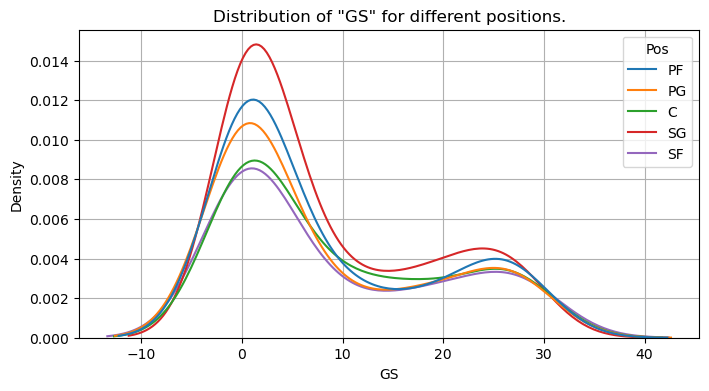

In [113]:
plt.figure(figsize = (8,4))
sns.kdeplot(df, x = 'GS', hue = 'Pos')
plt.title('Distribution of "GS" for different positions.')
plt.grid()

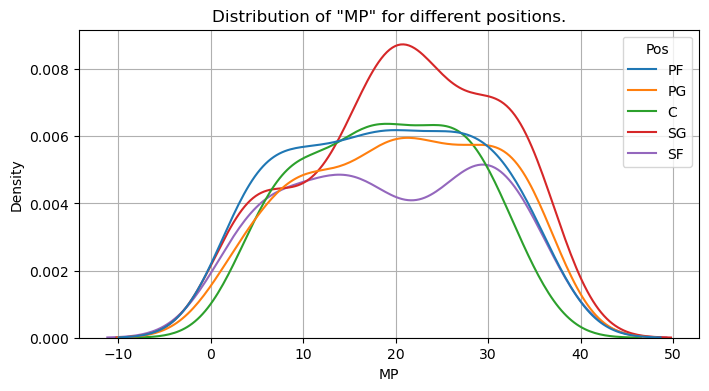

In [114]:
plt.figure(figsize = (8,4))
sns.kdeplot(df, x = 'MP', hue = 'Pos')
plt.title('Distribution of "MP" for different positions.')
plt.grid()

As the distributions for 'GS' look very similar for all player positions, it will be dropped.

In [115]:
# df.drop(['GS'], axis = 1, inplace = True)

#### Distribution analysis for ORB,	DRB, AST, STL, BLK,	TOV	and PF

In [116]:
df.groupby('Pos')['ORB'].describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,90.0,1.751111,1.014086,0.0,1.000,1.55,2.275,4.6
PF,104.0,0.872115,0.655145,0.0,0.400,0.70,1.300,2.9
PG,96.0,0.448958,0.395233,0.0,0.175,0.40,0.600,1.8
SF,85.0,0.618824,0.467642,0.0,0.300,0.50,0.900,1.8
SG,122.0,0.473770,0.356707,0.0,0.200,0.40,0.700,1.8


In [117]:
df.groupby('Pos')['DRB'].describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,90.0,4.040000,2.357431,0.0,2.425,3.60,5.300,9.9
PF,104.0,3.134615,2.003093,0.0,1.800,2.85,4.400,9.7
PG,96.0,2.234375,1.648465,0.0,1.000,1.90,2.925,7.7
SF,85.0,2.568235,1.621743,0.0,1.200,2.50,3.500,6.4
SG,122.0,2.314754,1.482943,0.0,1.125,2.05,3.375,7.6


In [118]:
df.groupby('Pos')['AST'].describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,90.0,1.322222,1.217455,0.0,0.600,1.00,1.700,8.6
PF,104.0,1.526923,1.588626,0.0,0.475,1.00,1.800,8.3
PG,96.0,3.505208,2.443611,0.0,1.575,3.05,5.300,9.5
SF,85.0,1.537647,1.456592,0.0,0.500,1.10,2.100,7.4
SG,122.0,2.183607,2.066592,0.0,0.900,1.60,2.775,11.8


In [119]:
df.groupby('Pos')['STL'].describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,90.0,0.497778,0.356946,0.0,0.3,0.4,0.700,1.6
PF,104.0,0.521154,0.408091,0.0,0.2,0.5,0.800,1.9
PG,96.0,0.746875,0.474609,0.0,0.4,0.8,1.100,1.9
SF,85.0,0.601176,0.448143,0.0,0.3,0.5,0.900,2.0
SG,122.0,0.665574,0.402219,0.0,0.3,0.7,0.975,1.7


In [120]:
df.groupby('Pos')['BLK'].describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,90.0,0.911111,0.596703,0.0,0.500,0.8,1.2,3.5
PF,104.0,0.452885,0.406968,0.0,0.175,0.3,0.7,2.0
PG,96.0,0.213542,0.228321,0.0,0.000,0.1,0.3,1.0
SF,85.0,0.318824,0.282630,0.0,0.100,0.3,0.5,1.2
SG,122.0,0.270492,0.222936,0.0,0.100,0.2,0.4,1.0


In [121]:
df.groupby('Pos')['TOV'].describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,90.0,1.123333,0.831953,0.0,0.600,1.00,1.4,5.0
PF,104.0,1.030769,0.779977,0.0,0.500,0.90,1.4,3.7
PG,96.0,1.435417,1.085501,0.0,0.600,1.15,2.1,4.9
SF,85.0,0.918824,0.670908,0.0,0.500,0.70,1.2,3.6
SG,122.0,1.164754,0.922530,0.0,0.525,0.95,1.5,4.3


In [122]:
df.groupby('Pos')['PF'].describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,90.0,2.047778,0.852126,0.0,1.6,2.00,2.6,4.1
PF,104.0,1.633654,0.872182,0.0,0.9,1.80,2.2,3.6
PG,96.0,1.491667,0.832456,0.0,0.8,1.45,2.1,4.0
SF,85.0,1.528235,0.852114,0.0,1.1,1.50,2.2,4.0
SG,122.0,1.599180,0.735015,0.0,1.2,1.60,2.1,3.3


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pos     497 non-null    object 
 1   G       497 non-null    int64  
 2   GS      497 non-null    int64  
 3   MP      497 non-null    float64
 4   FGA     497 non-null    float64
 5   FG%     497 non-null    float64
 6   3PA     497 non-null    float64
 7   3P%     497 non-null    float64
 8   2PA     497 non-null    float64
 9   2P%     497 non-null    float64
 10  eFG%    497 non-null    float64
 11  FTA     497 non-null    float64
 12  FT%     497 non-null    float64
 13  ORB     497 non-null    float64
 14  DRB     497 non-null    float64
 15  AST     497 non-null    float64
 16  STL     497 non-null    float64
 17  BLK     497 non-null    float64
 18  TOV     497 non-null    float64
 19  PF      497 non-null    float64
dtypes: float64(17), int64(2), object(1)
memory usage: 77.8+ KB


### Get encoded labels and split data

In [124]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [125]:
# initialize label encoder and transform labels
le = LabelEncoder()
transformed_labels = pd.Series(le.fit_transform(df['Pos'].tolist()), name = "Position")

In [126]:
# add encoded labels as a new column and drop previous position column
df["Position"] = transformed_labels
df.drop(['Pos'], axis = 1, inplace = True)

In [127]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Position'], axis = 1),
                                                    df['Position'], test_size = 0.25)

As players with less Minutes Played Per Game(MP) are less indicative of their true characteristics, any datapoint with MP < 8.0 (~ 25th percentile) will be dropped

In [128]:
# check how many datapoints have MP < 7
X_train[X_train['MP'] < 8.0].count()['MP']

53

In [129]:
# drop datapoints with MP < 8.0
drop_indices = X_train[X_train['MP'] < 8.0].index.tolist()

In [130]:
X_train.drop(drop_indices, axis = 0, inplace = True)
y_train.drop(drop_indices, axis = 0, inplace = True)

### Model Selection

As our data has a lot of attributes, using KNN would require standardization and distance predictions may get expensive. On the other hand, linear SVM would be much faster but require the classes to be separated by a linear descision boundary. Although descision trees are prone to overfitting, it can be avoided by using a tree of a fixed depth.

#### Descision Tree

In [131]:
from sklearn.tree import DecisionTreeClassifier

In [132]:
# create models with various depths
dtrees_list = []

d_vals = list(range(1, 19))

for d in d_vals:
    dtrees_list.append(DecisionTreeClassifier(max_depth = d))
    
# train all trees
for dtree in dtrees_list:
    dtree.fit(X_train, y_train)

In [133]:
# get training and test accuracy for all trees
tr_acc = []
test_acc = []

for dtree in dtrees_list:
    tr_acc.append(dtree.score(X_train, y_train))
    test_acc.append(dtree.score(X_test, y_test))

#### Plot training vs test accuracy for various depths

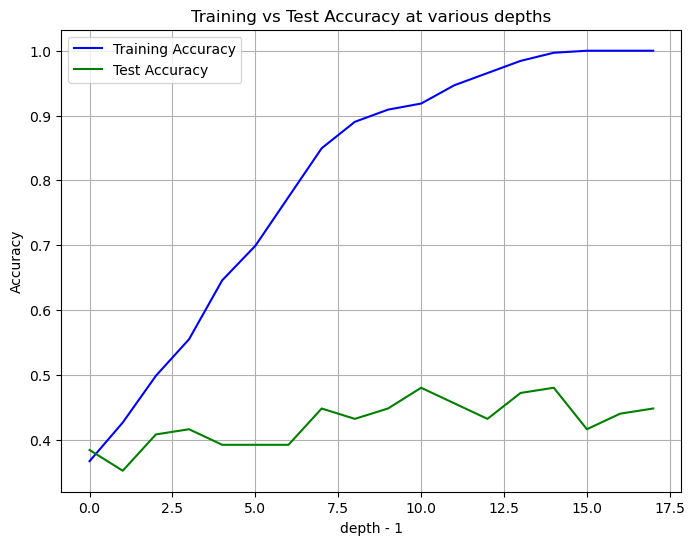

In [134]:
plt.figure(figsize = (8, 6))
plt.plot(tr_acc, color = "blue")
plt.plot(test_acc, color = "green")
plt.grid()
plt.title('Training vs Test Accuracy at various depths')
plt.xlabel('depth - 1')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Test Accuracy'])

In [135]:
# get maximum accuracy value
max_val = max(tr_acc)
idx = tr_acc.index(max_val)
print(f'The maximum accuracy for training is {max(tr_acc):0.3f} for a depth of = {idx + 1}.')

max_val = max(test_acc)
idx = test_acc.index(max_val)
print(f'The maximum accuracy for test is {max(test_acc):0.3f} for a depth of = {idx + 1}.')

The maximum accuracy for training is 1.000 for a depth of = 16.
The maximum accuracy for test is 0.480 for a depth of = 11.


#### SVM

In [136]:
from sklearn.svm import SVC

In [151]:
# create models with various depths
svm_list = []

for C in range(1, 35):
    svm_list.append(SVC(C = C, kernel = 'linear'))
    
# train all trees
for svm_model in svm_list:
    svm_model.fit(X_train, y_train)

In [152]:
# get training and test accuracy for all trees
tr_acc = []
test_acc = []

for svm_model in svm_list:
    tr_acc.append(svm_model.score(X_train, y_train))
    test_acc.append(svm_model.score(X_test, y_test))

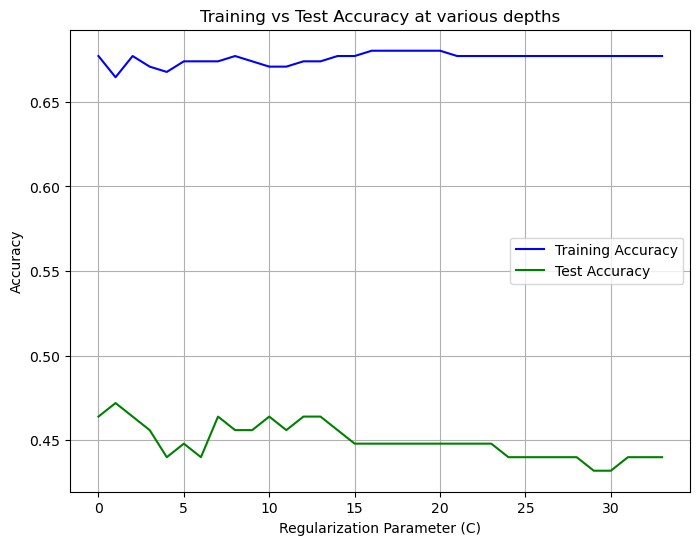

In [153]:
plt.figure(figsize = (8, 6))
plt.plot(tr_acc, color = "blue")
plt.plot(test_acc, color = "green")
plt.grid()
plt.title('Training vs Test Accuracy at various depths')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Test Accuracy'])

In [154]:
# get maximum accuracy value
max_val = max(tr_acc)
idx = tr_acc.index(max_val)
print(f'The maximum accuracy for training is {max(tr_acc):0.3f} for a C of = {idx + 1}.')

max_val = max(test_acc)
idx = test_acc.index(max_val)
print(f'The maximum accuracy for test is {max(test_acc):0.3f} for a C of = {idx + 1}.')

The maximum accuracy for training is 0.680 for a C of = 17.
The maximum accuracy for test is 0.472 for a C of = 2.


#### Gaussian NB

In [141]:
from sklearn.naive_bayes import GaussianNB

In [142]:
# create model and fit data
nb_model = GaussianNB().fit(X_train, y_train)

# get accuracy values
tr_acc = nb_model.score(X_train, y_train)
test_acc = nb_model.score(X_test, y_test)

print(f'Training accuracy: {tr_acc:0.3f}')
print(f'Test accuracy: {test_acc:0.3f}')

Training accuracy: 0.502
Test accuracy: 0.408


#### KNN

In [143]:
from sklearn.neighbors import KNeighborsClassifier

In [144]:
knn_list = []

for k in range(1, 20):
    knn_list.append(KNeighborsClassifier(n_neighbors=k))


In [145]:
# import scaler
from sklearn.preprocessing import StandardScaler

In [146]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [147]:
# train all trees
for knn_model in knn_list:
    knn_model.fit(X_train, y_train)

In [148]:
# get training and test accuracy for all trees
tr_acc = []
test_acc = []

for knn_model in knn_list:
    tr_acc.append(knn_model.score(X_train, y_train))
    test_acc.append(knn_model.score(X_test, y_test))

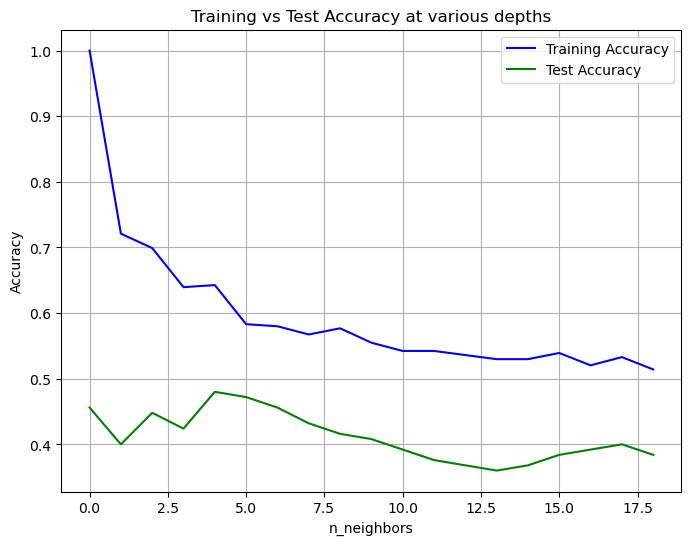

In [149]:
plt.figure(figsize = (8, 6))
plt.plot(tr_acc, color = "blue")
plt.plot(test_acc, color = "green")
plt.grid()
plt.title('Training vs Test Accuracy at various depths')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Test Accuracy'])

In [150]:
# get maximum accuracy value
max_val = max(tr_acc)
idx = tr_acc.index(max_val)
print(f'The maximum accuracy for training is {max(tr_acc):0.3f} for a K of = {idx + 1}.')

max_val = max(test_acc)
idx = test_acc.index(max_val)
print(f'The maximum accuracy for test is {max(test_acc):0.3f} for a K of = {idx + 1}.')

The maximum accuracy for training is 1.000 for a K of = 1.
The maximum accuracy for test is 0.480 for a K of = 5.


#### 1) Conclusion
KNN has the highest test accuracy of 0.48.

In [157]:
# model with k = 5 is at index 4
final_knn_model = knn_list[4]

# get predictions on test data
y_pred = final_knn_model.predict(X_test)

### 2) Model Accuracy

In [163]:
from sklearn.metrics import accuracy_score

print(f'Total accuracy for test set is {accuracy_score(y_test, y_pred):0.2f} percent.')

Total accuracy for test set is 0.48 percent.


### 3) Confusion Matrix

In [158]:
print("Test Confusion matrix:")
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

Test Confusion matrix:
Predicted   0   1   2   3   4  All
True                              
0          22   5   2   0   1   30
1           5  11   2   8   3   29
2           0   3  11   0   6   20
3           2   4   3   4   5   18
4           0   5   7   4  12   28
All        29  28  25  16  27  125


In [159]:
le.inverse_transform([0, 1, 2, 3, 4])

array(['C', 'PF', 'PG', 'SF', 'SG'], dtype='<U2')

### 4) 10-Fold Cross Validation

In [164]:
from sklearn.model_selection import cross_val_score

In [167]:
# extract complete dataset from df
X = df.drop(['Position'], axis = 1)
y = df['Position']

In [168]:
# standardize data
sc = StandardScaler()
X_trans = sc.fit_transform(X)

In [169]:
# initialize KNN model with k = 5
knn_model = KNeighborsClassifier(n_neighbors = 5)

In [172]:
# get cross validation scores
cv_scores = cross_val_score(model, X_trans, y, cv = 10)

### 5) Accuracy scores for each fold

In [174]:
# print scores
print('Accuracy scores for 10-Fold CV are: ')
for i in range(len(cv_scores)):
    print(f'{i+1}: {cv_scores[i]:0.3f}')

Accuracy scores for 10-Fold CV are: 
1: 0.460
2: 0.420
3: 0.400
4: 0.400
5: 0.320
6: 0.400
7: 0.540
8: 0.510
9: 0.367
10: 0.490


In [175]:
print(f'The average score for cross-validation is: {cv_scores.mean()}')

The average score for cross-validation is: 0.430734693877551
